In [89]:
import pandas as pd
import numpy as np
import plotly as py
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import  plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from scipy.spatial.distance import euclidean
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline
#plt.rcParams['figure.figsize'] = [8, 8]

import warnings
warnings.filterwarnings('ignore')

## KNN в задаче классификации

In [2]:
X, y = datasets.make_blobs(n_samples=100, random_state=4, centers=2, cluster_std=2)
X[:5], y[:5] 

(array([[13.78731721,  1.73323541],
        [10.68075246,  3.87600675],
        [ 8.09139034,  0.36429043],
        [10.80129018,  6.34922981],
        [ 8.78819007,  2.53766878]]),
 array([0, 1, 1, 1, 0]))

In [3]:
def get_class_color(class_label):
    return 'green' if class_label else 'blue'

In [4]:
def plot_points(X, y, new_points=None, new_prediction=None, nearest_points=None, file_name=None):
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], c=[get_class_color(y_i) for y_i in y], s=100, edgecolor='black', alpha=0.3)
    
    if new_points is not None:
        plt.scatter(new_points[:, 0], new_points[:, 1], c='black', s=100, edgecolor='black')
        
    if new_prediction is not None:
        plt.scatter(new_points[:, 0], new_points[:, 1], c=[get_class_color(y_i) for y_i in new_prediction], s=100, edgecolor='black')

    if nearest_points is not None:
        plt.scatter(nearest_points[:, 0], nearest_points[:, 1], c='red', s=100, edgecolor='black')

    plt.title('Classification problem \n What is colour for the new (x1, x2) pair?')
    plt.xlabel('x1 (feature)')
    plt.ylabel('x2 (feature)')
    
    if file_name:
        plt.savefig(filename)


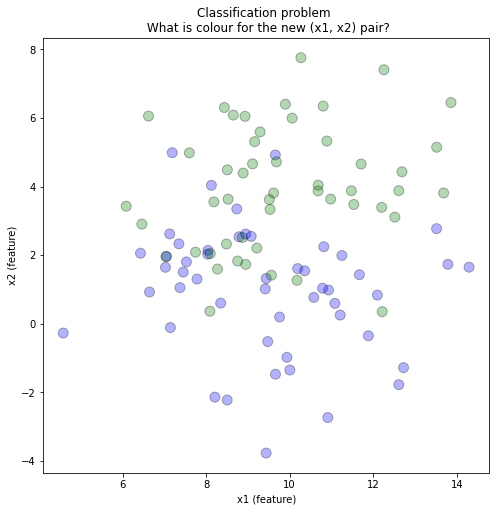

In [5]:
plot_points(X, y)

In [6]:
X_new = np.array([[12, 6]])

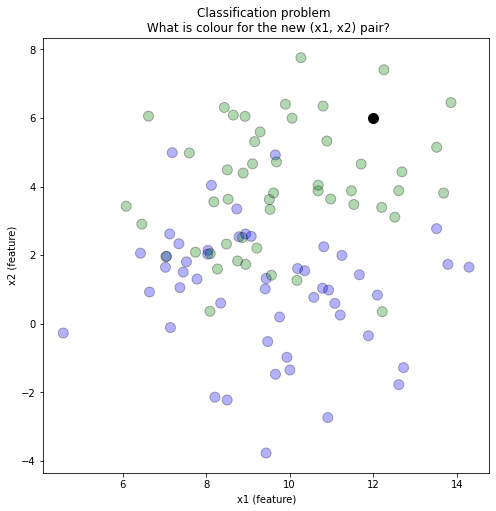

In [7]:
plot_points(X, y, new_points=X_new)

In [8]:
def find_nearest_point_index(x_new, X):
    d_min = euclidean(x_new, X[0])
    min_idx = 0
    for idx in range(1, X.shape[0]):
        d = euclidean(x_new, X[idx])
        if d < d_min:
            d_min = d
            min_idx = idx
    return min_idx

min_idx = find_nearest_point_index(X_new, X)

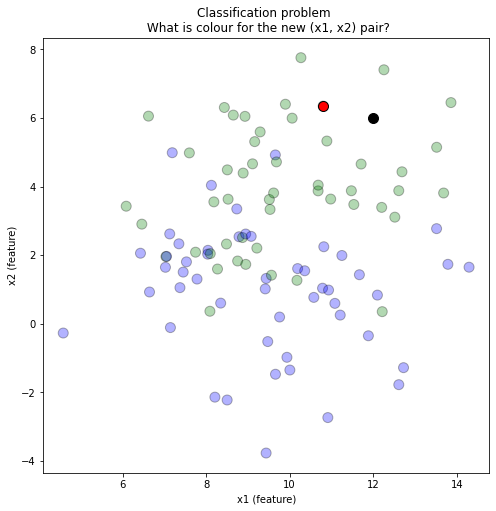

In [9]:
plot_points(X, y, new_points=X_new, nearest_points=X[[min_idx]])

In [10]:
def predict_class(x_new, X, y):
    min_idx = find_nearest_point_index(x_new, X)
    return y[min_idx]

y_new = predict_class(X_new, X, y)

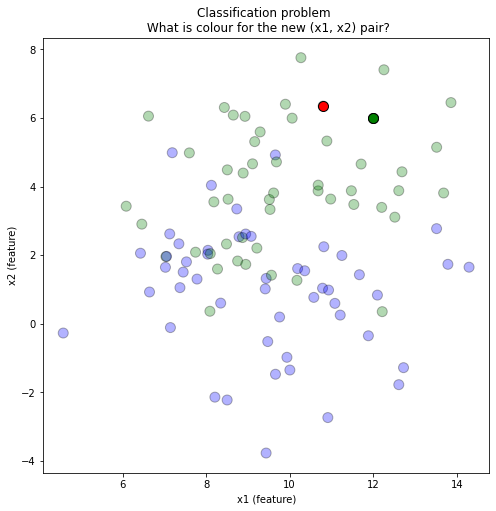

In [11]:
plot_points(X, y, new_points=X_new, new_prediction=[y_new], nearest_points=X[[min_idx]])

In [12]:
X_new = np.array([[12, -2]])
min_idx = find_nearest_point_index(X_new, X)
y_new = predict_class(X_new, X, y)

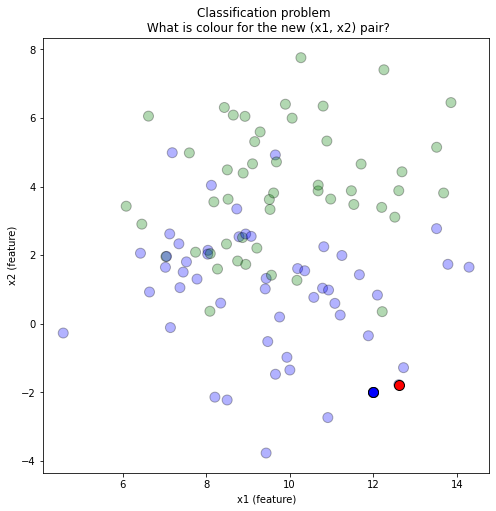

In [13]:
plot_points(X, y, new_points=X_new, new_prediction=[y_new], nearest_points=X[[min_idx]])

## Sklearn

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X_new)

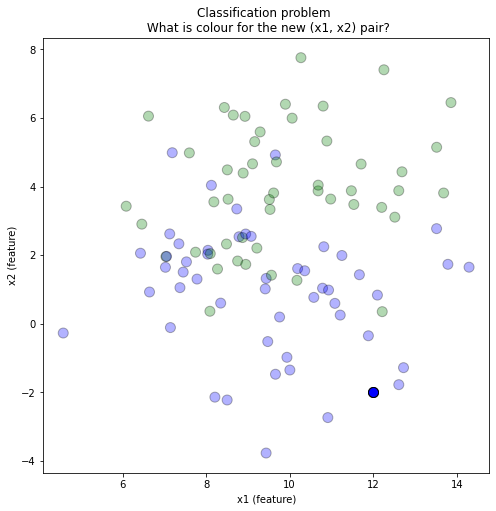

In [16]:
plot_points(X, y, new_points=X_new, new_prediction=[y_pred])

In [17]:
 X_new = np.c_[np.random.randint(5, 15, 10), np.random.randint(-2, 8, 10)]

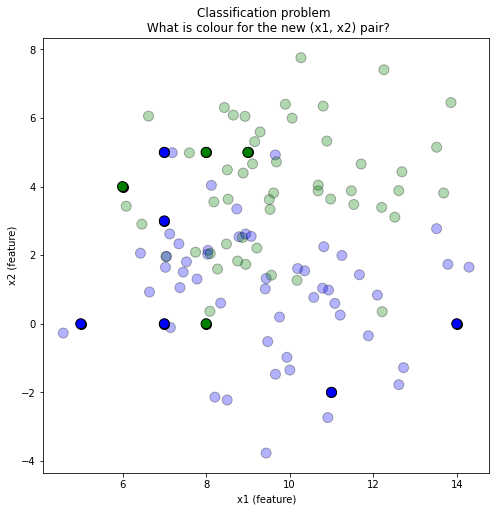

In [18]:
plot_points(X, y, new_points=X_new, new_prediction=knn.predict(X_new))

In [19]:
from scipy.spatial.distance import cdist
from collections import Counter

In [20]:
def predict_class(x_new, X, y, k=1):
    #cdist расчитывает попарные расстояния между объектами
    dist = cdist(x_new, X)
    
    # argpartition находит отсортированные индексы
    nearest_y = y[np.argpartition(dist, k, axis=1)[:, :k]]
    return np.array([Counter(row).most_common(1)[0][0] for row in nearest_y])

In [21]:
y_pred = predict_class(X_new, X, y, k=3)

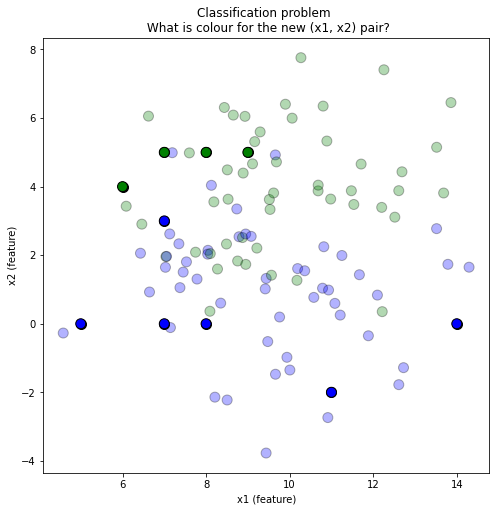

In [22]:
plot_points(X, y, new_points=X_new, new_prediction=y_pred)

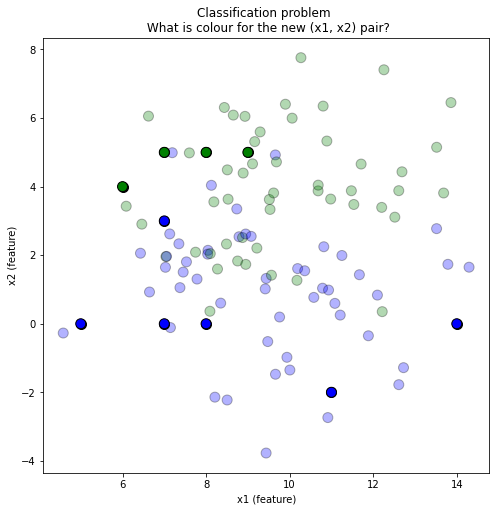

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
y_pred = knn.predict(X_new)
plot_points(X, y, new_points=X_new, new_prediction=y_pred)

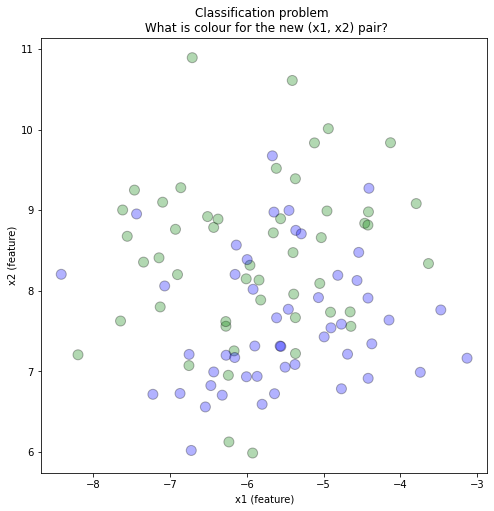

In [24]:
X, y = datasets.make_blobs(n_samples=100, random_state=5, centers=2)
plot_points(X, y)

## Влияние числа соседей k

In [25]:
h = 0.2
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
x_pred = np.c_[xx.ravel(), yy.ravel()]

In [26]:
def plot_knn_classifier(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    Z = knn.predict(x_pred)
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(12, 8))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')
    
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

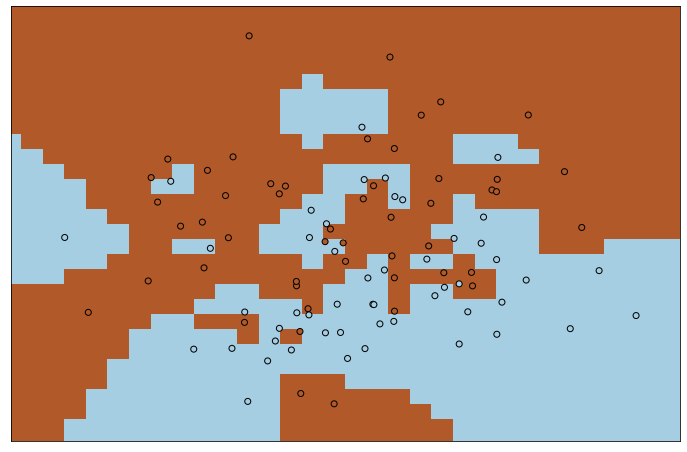

In [27]:
plot_knn_classifier(1)

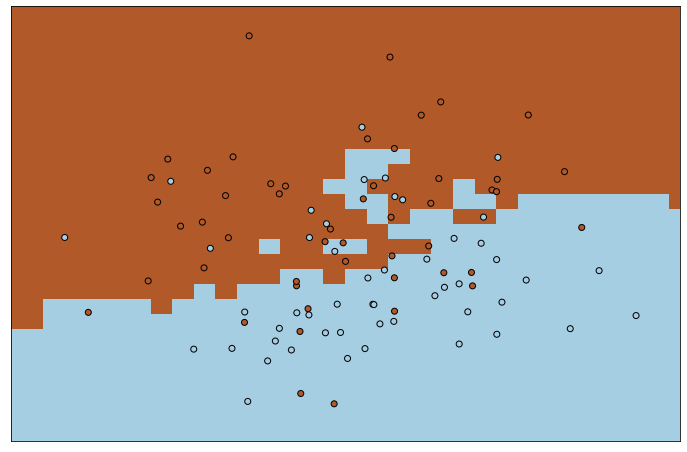

In [28]:
plot_knn_classifier(10)

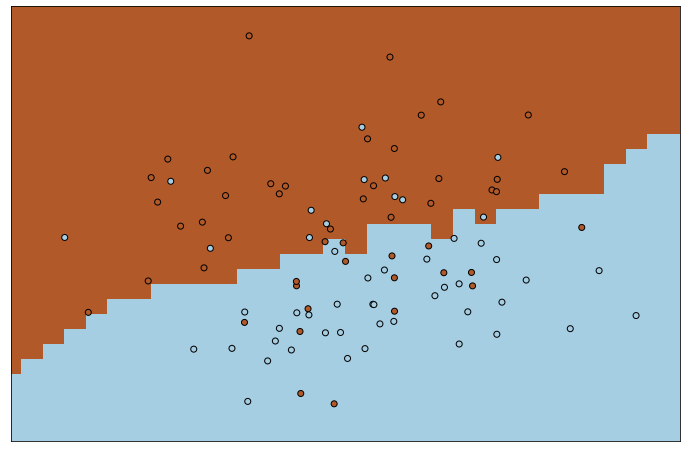

In [29]:
plot_knn_classifier(30)

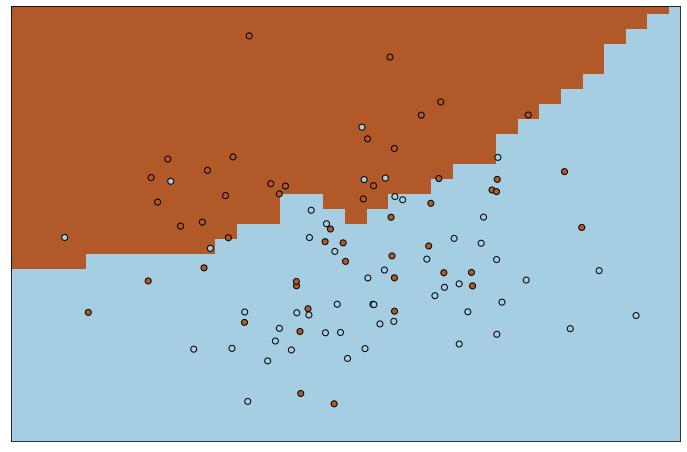

In [30]:
plot_knn_classifier(90)

## Нормализация данных в knn

In [31]:
X, y = datasets.make_blobs(n_samples=100, random_state=4, centers=2, cluster_std=2)
X[:, 1] *= 1000000000
X[:5], y[:5]

(array([[1.37873172e+01, 1.73323541e+09],
        [1.06807525e+01, 3.87600675e+09],
        [8.09139034e+00, 3.64290431e+08],
        [1.08012902e+01, 6.34922981e+09],
        [8.78819007e+00, 2.53766878e+09]]),
 array([0, 1, 1, 1, 0]))

In [32]:
def plot_points_scaled(X, y, new_points=None, new_prediction=None, nearest_point=None, file_name=None):
    plt.scatter(X[:, 0], X[:, 1], c=[get_class_color(y_i) for y_i in y], s=100, edgecolor='black', alpha=0.3)
    plt.figure(1, figsize=(12, 8))
    plt.title('Classification problem \n What is colour for the new (x1, x2) pair?')
    plt.xlabel('x1 (feature)')
    plt.ylabel('x2 (feature)')
    plt.gca().set_aspect('equal', adjustable='datalim')
    if file_name:
        plt.savefig(filename)

In [33]:
def quality(prediction_y, true_y):
    accuracy = accuracy_score(prediction_y, true_y)
    precision = precision_score(prediction_y, true_y)
    recall = recall_score(prediction_y, true_y)
    f1 = f1_score(prediction_y, true_y)
    print(f'Accuracy: {accuracy:.3f},\nPrecision: {precision:.3f}\nRecall: {recall:.3f}\nF-measure: {f1:.3f}')

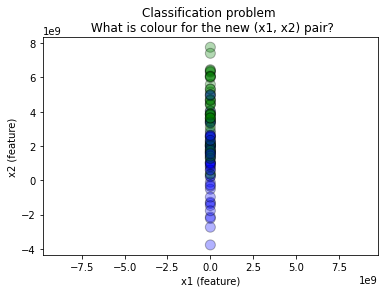

In [34]:
plot_points_scaled(X, y)

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
quality(y_pred, y)

Accuracy: 0.810,
Precision: 0.760
Recall: 0.844
F-measure: 0.800


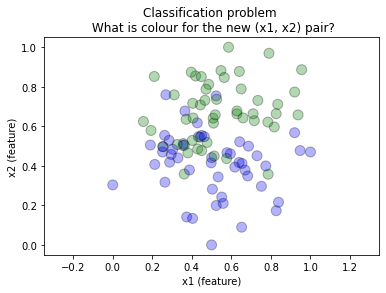

In [36]:
X_scaled = MinMaxScaler().fit_transform(X)
plot_points_scaled(X_scaled, y)

In [37]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y)
y_pred = knn.predict(X_scaled)
quality(y_pred, y)

Accuracy: 0.870,
Precision: 0.860
Recall: 0.878
F-measure: 0.869


## Выбор параметров модели

500


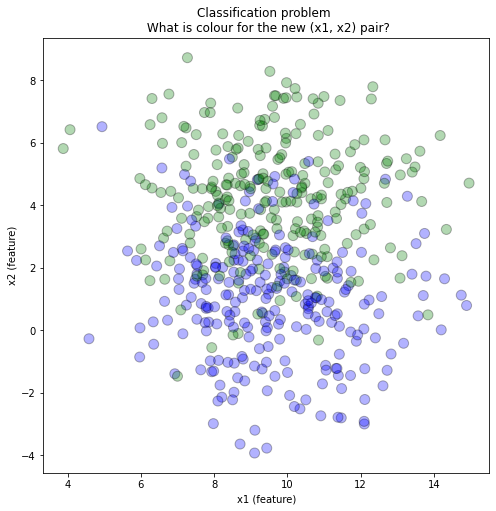

In [38]:
X, y = datasets.make_blobs(n_samples=500, random_state=4, centers=2, cluster_std=2)

print(len(X))
plot_points(X, y)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 2), (200, 2), (300,), (200,))

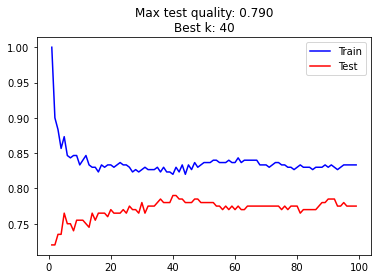

In [41]:
neighbors = range(1, 100)
accuracy_train = []
accuracy_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy_train.append(accuracy_score(knn.predict(X_train), y_train))
    accuracy_test.append(accuracy_score(knn.predict(X_test), y_test))

plt.plot(neighbors, accuracy_train, color='blue', label='Train')
plt.plot(neighbors, accuracy_test, color='red', label='Test')
plt.title(f'Max test quality: {max(accuracy_test):.3f}\nBest k: {np.argmax(accuracy_test)+1}')
plt.legend()
plt.show()

## Кросс-валидация (k-fold cross-validation)

In [42]:
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy') # cv - число фолдов на которые делится выборка
print(scores)
print('mean', scores.mean())
print('std', scores.std())

[0.8  0.78 0.8  0.77 0.72]
mean 0.774
std 0.029393876913398165


Предсказание ортопедических проблем по измерениям костей таза и нижнего позвоночника.

In [43]:
data = pd.read_csv('datasets/column_2C_weka.csv')

In [44]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [45]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [46]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

## Распределение целевой переменной

In [47]:
data['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

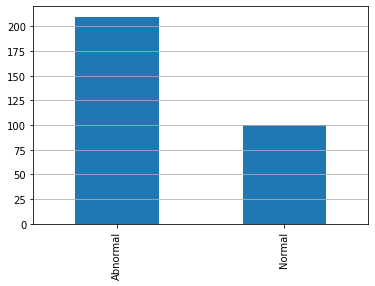

In [48]:
data['class'].value_counts().plot.bar(figsize=(6, 4))
plt.grid(axis='y')

In [49]:
data['class'].value_counts(normalize=True)

Abnormal    0.677419
Normal      0.322581
Name: class, dtype: float64

**Здесь можно прикинуть наш baseline качества, с которым можно будет сравнивать результаты работы модели. 
Если у нас 68% одного класса и 32% другого, то даже если наша модель будет прелсказывать сплошные *Abnormal*, то *Accuracy*
будет равна, в среднем 68%.**

array([[<AxesSubplot:title={'center':'pelvic_incidence'}>,
        <AxesSubplot:title={'center':'pelvic_tilt numeric'}>],
       [<AxesSubplot:title={'center':'lumbar_lordosis_angle'}>,
        <AxesSubplot:title={'center':'sacral_slope'}>],
       [<AxesSubplot:title={'center':'pelvic_radius'}>,
        <AxesSubplot:title={'center':'degree_spondylolisthesis'}>]],
      dtype=object)

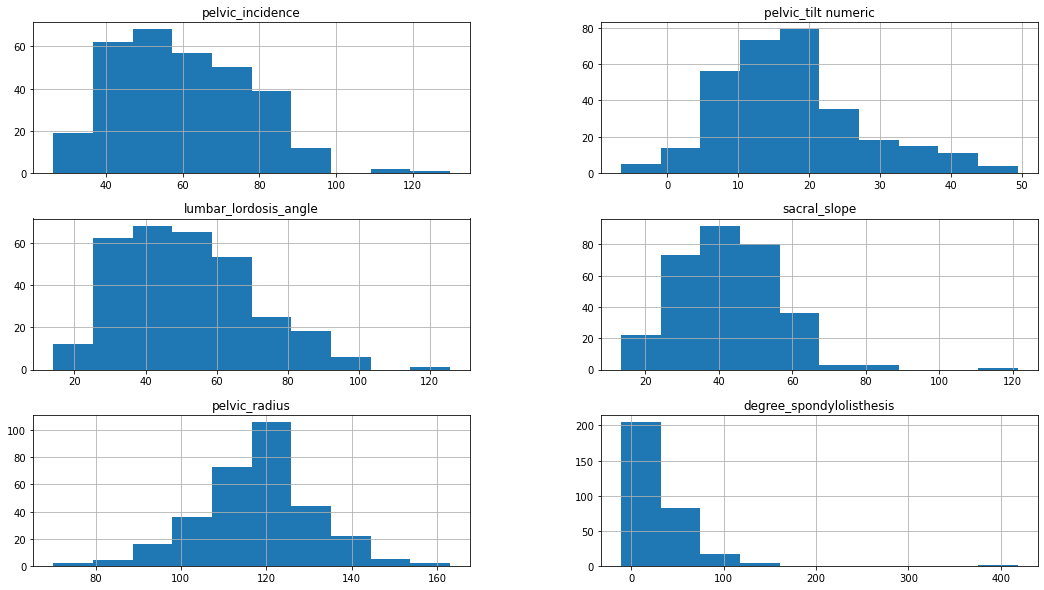

In [50]:
data.hist(figsize=(18, 10))

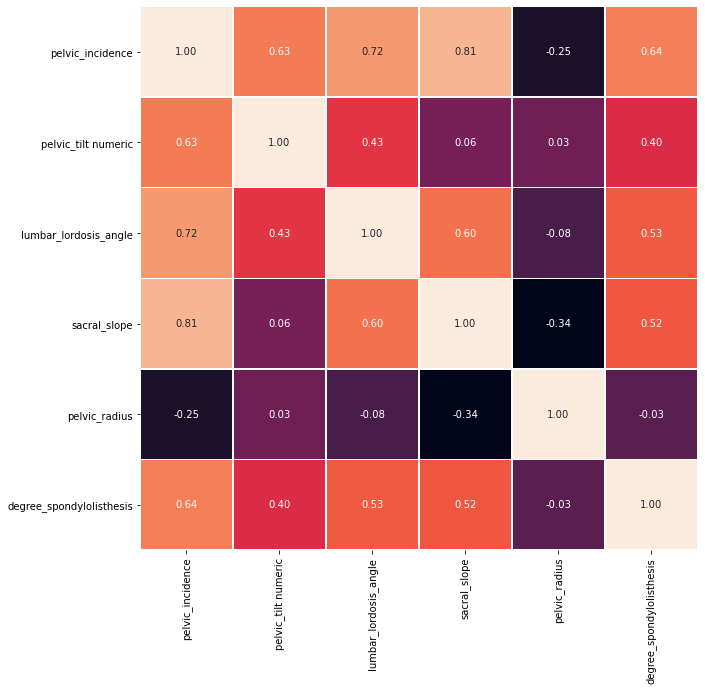

In [51]:
# correlation map
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cbar=False, linewidth=0.5, fmt='0.2f')
plt.show()

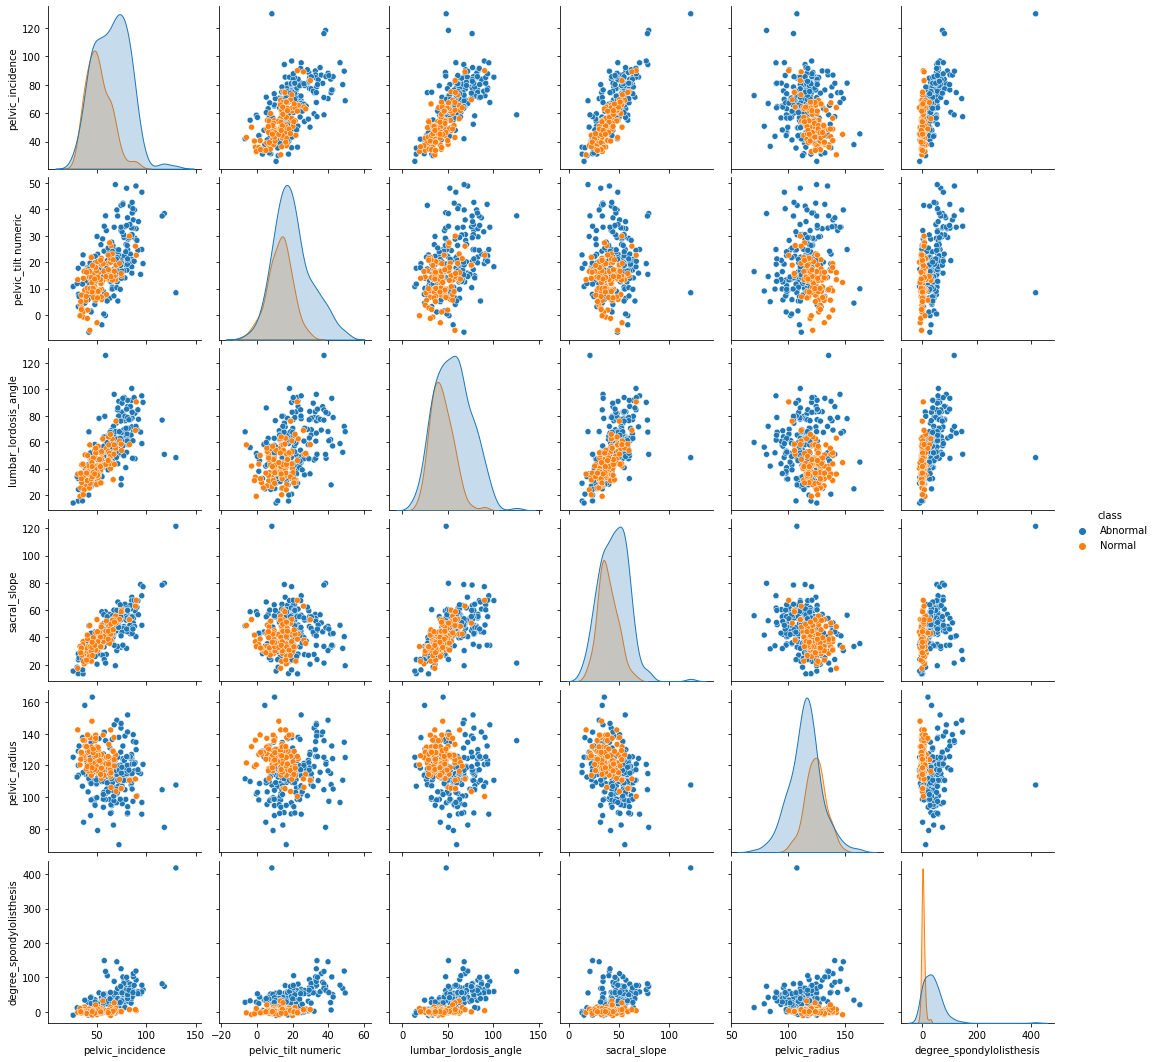

In [52]:
sns.pairplot(data, hue='class')

## Plotly library

In [54]:
# creating trace1
trace1 = go.Scatter(
                    x = np.arange(0, 310),
                    y = data[data['class'] == 'Normal'].sacral_slope,
                    mode = 'markers',
                    name = 'Normal',
                    marker = dict(color = 'rgba(0, 100, 255, 0.8)'),
                    text = data['class'])
# creating trace2
trace2 = go.Scatter(
                    x = np.arange(0, 310),
                    y = data[data['class'] == 'Abnormal'].sacral_slope,
                    mode = 'markers',
                    name = 'Abnormal',
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = data['class'])
df = [trace1, trace2]
layout = dict(title = 'sacral_slope',
              xaxis = dict(title = 'index', ticklen=5, zeroline=False),
              yaxis = dict(title = 'values', ticklen=5, zeroline=False),
             )
fig = dict(data=df, layout=layout)
iplot(fig)

# Перекодируем целевую

In [55]:
data['class'].head()

0    Abnormal
1    Abnormal
2    Abnormal
3    Abnormal
4    Abnormal
Name: class, dtype: object

In [56]:
data['class'] = data['class'].apply(lambda x: 1 if x == 'Abnormal' else 0)

In [57]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


# Train-test split
Параметр ***stratify*** позволяет вам создавать такие разбиения, в которых 
распределения указанной переменной будут сохраняться. Очень полезо при дисбалансе классов, т.е. когда одних 
классов больше чем других.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['class'], axis=1), data['class'], test_size=0.20, random_state=42, stratify=data['class']
)

In [70]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((248, 6), (62, 6), (248,), (62,))

In [71]:
y_train.value_counts(normalize=True)

1    0.677419
0    0.322581
Name: class, dtype: float64

In [72]:
y_test.value_counts(normalize=True)

1    0.677419
0    0.322581
Name: class, dtype: float64

# Scaling

## Важно!

Учим на трейне - применяем на тесте. Практически все методы препроцессинга так или иначе используютинформацию из выборкиб например, при стандартизации считается среднее и дисперсия, значит, мы не хотим, чтобы информация из 
отложенной выборки просачивалась в тренировочную (data leak).

In [75]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Подбор параметров разными способами

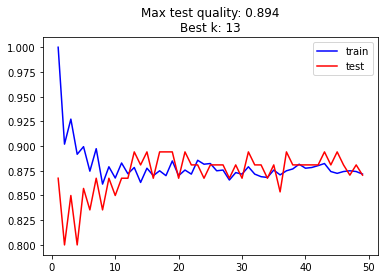

In [78]:
neighbors = range(1, 50)
f1_score_train = []
f1_score_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    f1_score_train.append(f1_score(knn.predict(X_train_scaled), y_train))
    f1_score_test.append(f1_score(knn.predict(X_test_scaled), y_test))

plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title(f'Max test quality: {max(f1_score_test):.3f}\nBest k: {np.argmax(f1_score_test)+1}')
plt.legend();

# GridSearchCV

In [99]:
%%time

param_grid = {
    'n_neighbors': range(1, 50),
    'p': range(1, 4)
}
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

print(f'Best CV score: {grid_search.best_score_:.3f}, best CV k: {grid_search.best_estimator_.n_neighbors}')

test_predictions = grid_search.best_estimator_.predict(X_test_scaled)
print(f'Result test score: {f1_score(test_predictions, y_test):.3f}')

Best CV score: 0.885, best CV k: 33
Result test score: 0.881
Wall time: 5.66 s


# RandomizedSearchCV

In [101]:
%%time

param_grid = {
    'n_neighbors': range(1, 50),
    'p': range(1, 4)
}
knn = KNeighborsClassifier()

rand_search = RandomizedSearchCV(knn, param_grid, cv=5, scoring='f1', random_state=40)
rand_search.fit(X_train_scaled, y_train)

print(f'Best CV score: {rand_search.best_score_:.3f}, best CV k: {rand_search.best_estimator_.n_neighbors}')

test_predictions = rand_search.best_estimator_.predict(X_test_scaled)
print(f'Result test score: {f1_score(test_predictions, y_test):.3f}')

Best CV score: 0.873, best CV k: 37
Result test score: 0.881
Wall time: 451 ms
